# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

## Step 0 | Imports and Setup

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.lines as mlines

In [ ]:
os.listdir()

['Project_Template.ipynb',
 'countypres_2000-2024.csv.xlsx',
 'countypres_2000-2024.csv',
 'cleaned_data.csv',
 'urb_rur.csv']

In [ ]:
# Open a dataset from your project folder in Google Drive
#also can use 2012 vs 2024, could use all states, not just swing states, could set up a model looking at urban vs. rural counties (look at total voters)
#go from long to wide format 2.5, merging data
#get everything set up, so that we can run rgegressions when we get back, set up stat model
data = pd.read_csv('countypres_2000-2024.csv')

In [ ]:
data.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20250821,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20250821,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,113,17208,20250821,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,RALPH NADER,GREEN,160,17208,20250821,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20250821,TOTAL


## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [ ]:
# 1) Keep only Democrat rows
democrat = data[data['party'] == 'DEMOCRAT'].copy()

# 2) Calculate Democrat share as new column
democrat['d_share'] = democrat['candidatevotes'] / democrat['totalvotes']

# 3) Keep only years 2016 and 2000
urb_rur = democrat[democrat['year'].isin([2000, 2016])].copy()

urb_rur['now'] = (urb_rur['year'] == 2016).astype(int)

urb_rur['log_votes'] = np.log(urb_rur['totalvotes'])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
urb_rur


,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode,d_share,now,log_votes
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20250821,TOTAL,0.287192,0,9.753130
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20250821,TOTAL,0.247822,0,10.941642
8,2000,ALABAMA,AL,BARBOUR,1005.0,US PRESIDENT,AL GORE,DEMOCRAT,5188,10395,20250821,TOTAL,0.499086,0,9.249080
12,2000,ALABAMA,AL,BIBB,1007.0,US PRESIDENT,AL GORE,DEMOCRAT,2710,7101,20250821,TOTAL,0.381636,0,8.867991
16,2000,ALABAMA,AL,BLOUNT,1009.0,US PRESIDENT,AL GORE,DEMOCRAT,4977,17973,20250821,TOTAL,0.276915,0,9.796626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50510,2016,WYOMING,WY,SWEETWATER,56037.0,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,3231,17130,20250821,TOTAL,0.188616,1,9.748587
50513,2016,WYOMING,WY,TETON,56039.0,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,7314,12627,20250821,TOTAL,0.579235,1,9.443593
50516,2016,WYOMING,WY,UINTA,56041.0,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,1202,8470,20250821,TOTAL,0.141913,1,9.044286
50519,2016,WYOMING,WY,WASHAKIE,56043.0,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,532,3814,20250821,TOTAL,0.139486,1,8.246434


In [ ]:
model = smf.ols("d_share ~ log_votes + now + log_votes:now", data=urb_rur).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                d_share   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     765.0
Date:                Fri, 12 Dec 2025   Prob (F-statistic):               0.00
Time:                        17:07:28   Log-Likelihood:                 4309.8
No. Observations:                6309   AIC:                            -8612.
Df Residuals:                    6305   BIC:                            -8585.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0955      0.015      6.343

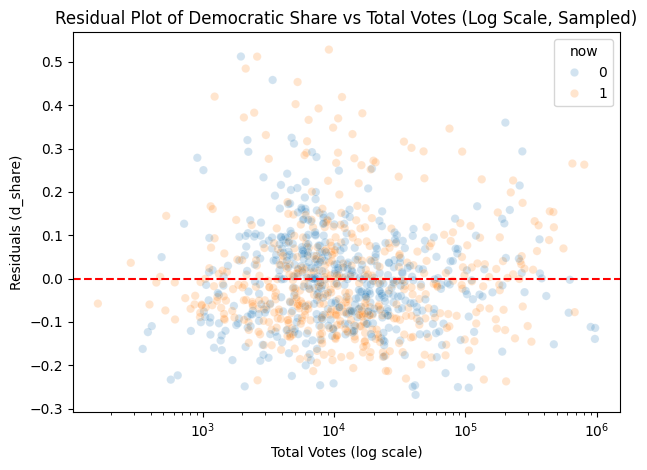

In [ ]:
urb_rur['residuals'] = model.resid

# Sample 1000 rows from urb_rur for plotting
urb_rur_sample = urb_rur.sample(n=1000) # Using a random_state for reproducibility

sns.scatterplot(
    data=urb_rur_sample,
    x="totalvotes",
    y="residuals",
    hue="now",
    alpha=0.2
)

plt.xscale("log")
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.title("Residual Plot of Democratic Share vs Total Votes (Log Scale, Sampled)")
plt.xlabel("Total Votes (log scale)")
plt.ylabel("Residuals (d_share)")
plt.tight_layout()
plt.show()

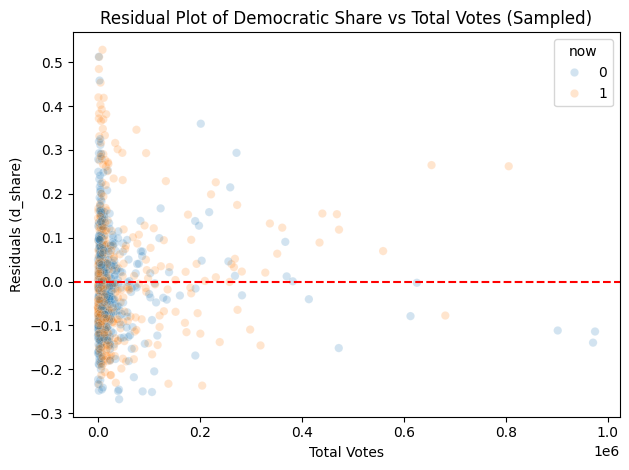

In [ ]:
urb_rur['residuals'] = model.resid

sns.scatterplot(
    data=urb_rur_sample,
    x="totalvotes",
    y="residuals",
    hue="now",
    alpha=0.2
)

plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.title("Residual Plot of Democratic Share vs Total Votes (Sampled)")
plt.xlabel("Total Votes")
plt.ylabel("Residuals (d_share)")
plt.tight_layout()
plt.show()

In [ ]:
# Save your dataset after you've worked on it
urb_rur.to_csv('urb_rur.csv')

## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

In [ ]:
# Exploratory Data Analysis here

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

In [ ]:
# Build and run your model here
# Did Democratic vote share change differently in urban versus rural counties between 2000 and 2016?
# Null: Urban and rural counties experienced the same change in Democratic vote share between 2000 and 2016.
# The key parameter of interest is the interaction between d_share and total votes and the year indicator (2000 vs 2016),
# which measures whether the change in Democratic vote share differs across the two years.




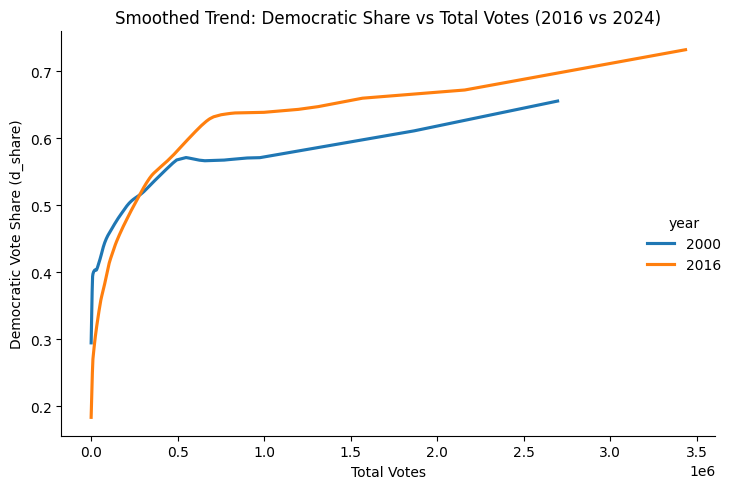

In [ ]:
sns.lmplot(
    data=urb_rur,
    x="totalvotes",
    y="d_share",
    hue="year",
    lowess=True,
    scatter=False,
    height=5,
    aspect=1.3
)

plt.title("Smoothed Trend: Democratic Share vs Total Votes (2016 vs 2024)")
plt.xlabel("Total Votes")
plt.ylabel("Democratic Vote Share (d_share)")
plt.tight_layout()


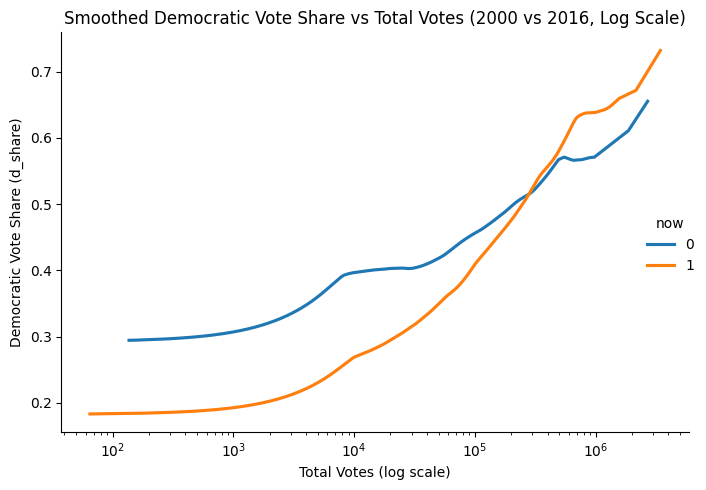

In [ ]:
sns.lmplot(
    data=urb_rur,
    x="totalvotes",
    y="d_share",
    hue="now",
    lowess=True,
    scatter=False,   # remove points
    height=5,
    aspect=1.3
)

plt.xscale("log")   # <-- log scale on x-axis

plt.title("Smoothed Democratic Vote Share vs Total Votes (2000 vs 2016, Log Scale)")
plt.xlabel("Total Votes (log scale)")
plt.ylabel("Democratic Vote Share (d_share)")
plt.tight_layout()


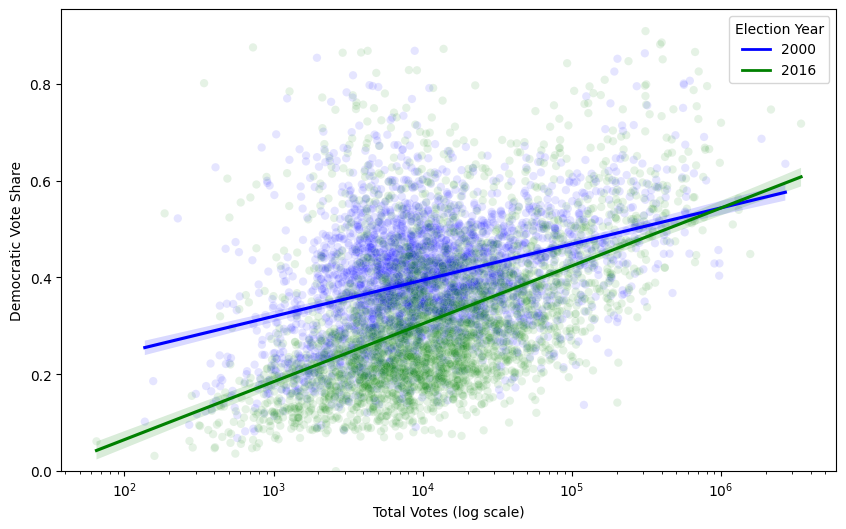

In [ ]:
plt.figure(figsize=(10,6))

# Scatter plot with custom colors
sns.scatterplot(
    data=urb_rur,
    x="totalvotes",
    y="d_share",
    hue="now",
    palette={0: "blue", 1: "green"},
    alpha=0.1
)

# Regression line for 2000 (now = 0)
sns.regplot(
    data=urb_rur[urb_rur['now'] == 0],
    x="totalvotes",
    y="d_share",
    scatter=False,
    logx=True,
    color="blue",
    label="2000 Trend"
)

# Regression line for 2016 (now = 1)
sns.regplot(
    data=urb_rur[urb_rur['now'] == 1],
    x="totalvotes",
    y="d_share",
    scatter=False,
    logx=True,
    color="green",
    label="2016 Trend"
)

# Log scale on x-axis
plt.xscale("log")

# Axis labels
plt.xlabel("Total Votes (log scale)")
plt.ylabel("Democratic Vote Share")

# Title
plt.title("")

# Legend label + custom entries
legend = plt.legend(title="Election Year", labels=["2000", "2016"])
blue_line = mlines.Line2D([], [], color="blue", label="2000", linewidth=2)
red_line  = mlines.Line2D([], [], color="green",  label="2016", linewidth=2)

plt.legend(handles=[blue_line, red_line], title="Election Year")

plt.ylim(bottom=0)
plt.show()


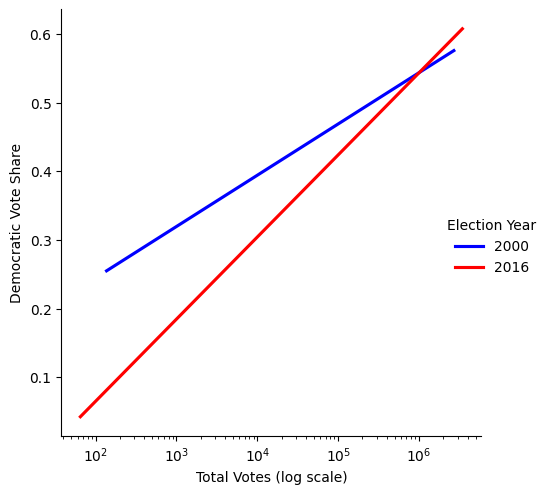

In [ ]:
g = sns.lmplot(
    data=urb_rur,
    x="totalvotes",
    y="d_share",
    hue="now",
    logx=True,
    scatter=False,
    ci=None,
    palette={0: "blue", 1: "red"}
)

plt.xscale("log")

# Add title to the legend/key
g._legend.set_title("Election Year")
g.set_axis_labels("Total Votes (log scale)", "Democratic Vote Share")

# Optional: rename labels inside the legend
new_labels = ["2000", "2016"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)


